Extracts Data from the Precriber Summary Information and Detailed Data of the Medicare Part D dataset.

In [1]:
import pandas as pd
import requests
import numpy as np

In [2]:
pd.set_option("display.max_columns", 150) #increase column options

In [3]:
md_base_url = "https://data.cms.gov/resource/" #Base URL to access Databases

Manipulation of Detailed Data (Database 1) 
Years: 2017

In [4]:
url_ID = "77gb-8z53"
dd_url = md_base_url + url_ID
print(dd_url)

https://data.cms.gov/resource/77gb-8z53


In [5]:
dd_provider = requests.get(dd_url, params={"$select":"nppes_provider_state,count(nppes_provider_state)", "$group": "nppes_provider_state"})
dd_provider_df = pd.read_json(dd_provider.content)
dd_provider_df[dd_provider_df.count_nppes_provider_state < 50000]
#retrieves the data based on providers per region

,count_nppes_provider_state,nppes_provider_state
0,6,AS
1,40,AA
2,222,XX
3,565,AE
4,1417,ZZ
5,319,AP
6,278,MP
7,1762,GU
8,37925,WY
9,3373,VI


In [6]:
dd_requests = requests.get(dd_url, params={"$where": "nppes_provider_state='DC'", "$limit": 50000})
#calls data of a specific state 

In [7]:
dd_requests.headers

{'Server': 'nginx', 'Date': 'Mon, 15 Jul 2019 14:55:24 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Socrata-RequestId': '6qn4h76ivobz2sz00n0lti3c7', 'Access-Control-Allow-Origin': '*', 'ETag': '"a59894aa67eab310d94159a04b9b406a--gzip"', 'Last-Modified': 'Wed, 01 May 2019 16:24:35 UTC', 'X-SODA2-Warning': 'X-SODA2-Fields, X-SODA2-Types, and X-SODA2-Legacy-Types are deprecated', 'X-SODA2-Fields': '["drug_name","total_day_supply","ge65_suppress_flag","npi","nppes_provider_first_name","total_claim_count_ge65","generic_name","total_30_day_fill_count_ge65","specialty_desc","total_day_supply_ge65","bene_count_ge65_suppress_flag","total_claim_count","nppes_provider_city","total_30_day_fill_count","bene_count_ge65","nppes_provider_state","nppes_provider_last_org_name","total_drug_cost","description_flag","total_drug_cost_ge65","bene_count"]', 'X-SODA2-Types': '["text","number","text","text","text","number","text","number

In [8]:
dd_df = pd.read_json(dd_requests.content)
dd_df = dd_df.sort_values(by=["npi","specialty_desc","drug_name"]) #read json & sort
dd_df.head(10)


,bene_count,bene_count_ge65,bene_count_ge65_suppress_flag,description_flag,drug_name,ge65_suppress_flag,generic_name,npi,nppes_provider_city,nppes_provider_first_name,nppes_provider_last_org_name,nppes_provider_state,specialty_desc,total_30_day_fill_count,total_30_day_fill_count_ge65,total_claim_count,total_claim_count_ge65,total_day_supply,total_day_supply_ge65,total_drug_cost,total_drug_cost_ge65
42422,NaN,NaN,#,S,ADVAIR DISKUS,#,FLUTICASONE/SALMETEROL,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,15.0,NaN,15,NaN,450,NaN,4692.26,NaN
18892,NaN,NaN,*,S,ALENDRONATE SODIUM,*,ALENDRONATE SODIUM,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,17.1,NaN,17,NaN,502,NaN,203.92,NaN
8223,NaN,NaN,*,S,ALLOPURINOL,NaN,ALLOPURINOL,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,22.0,22.0,22,22.0,660,660.0,158.63,158.63
25251,24.0,NaN,#,S,AMLODIPINE BESYLATE,NaN,AMLODIPINE BESYLATE,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,142.5,82.0,138,78.0,4275,2460.0,617.11,351.15
36992,NaN,NaN,*,S,AMMONIUM LACTATE,*,AMMONIUM LACTATE,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,14.0,NaN,14,NaN,384,NaN,419.47,NaN
20072,11.0,NaN,*,S,AMOXICILLIN-CLAVULANATE POTASS,*,AMOXICILLIN/POTASSIUM CLAV,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,12.0,NaN,12,NaN,111,NaN,144.49,NaN
2264,NaN,NaN,#,S,ATENOLOL,#,ATENOLOL,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,32.0,NaN,32,NaN,960,NaN,233.06,NaN
31241,NaN,NaN,*,S,ATORVASTATIN CALCIUM,NaN,ATORVASTATIN CALCIUM,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,62.3,22.0,60,20.0,1868,660.0,573.17,150.57
31435,11.0,NaN,*,S,AZITHROMYCIN,*,AZITHROMYCIN,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,12.0,NaN,12,NaN,57,NaN,70.76,NaN
18940,NaN,NaN,#,S,CARVEDILOL,#,CARVEDILOL,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,21.2,NaN,20,NaN,620,NaN,111.12,NaN


In [9]:
npi_drug_cross_df = pd.crosstab(dd_df["npi"], dd_df["drug_name"] , values=dd_df["total_claim_count"], 
                                  aggfunc=np.sum) #uses drug_name which is the brand names
npi_drug_cross_df = npi_drug_cross_df.fillna(0)
#npi_drug_cross_df.head(10)

In [10]:
npi_drugcost_cross_df = pd.crosstab(dd_df["npi"], dd_df["drug_name"] , values=dd_df["total_drug_cost"], 
                                  aggfunc=np.sum)
npi_drugcost_cross_df = npi_drugcost_cross_df.fillna(0)
npi_drugcost_cross_df.head(10)

drug_name,ABACAVIR,ABACAVIR-LAMIVUDINE,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,ABILIFY MAINTENA,ACAMPROSATE CALCIUM,ACARBOSE,ACCUPRIL,ACEBUTOLOL HCL,ACETAMINOPHEN-CODEINE,ACETAZOLAMIDE,ACTEMRA,ACYCLOVIR,ADACEL TDAP,ADAPALENE,ADCIRCA,ADDERALL,ADDERALL XR,ADEFOVIR DIPIVOXIL,ADEMPAS,ADVAIR DISKUS,ADVAIR HFA,AGGRENOX,ALBUTEROL SULFATE,ALCLOMETASONE DIPROPIONATE,ALCOHOL PADS,ALCOHOL PREP PADS,ALENDRONATE SODIUM,ALFUZOSIN HCL ER,ALLOPURINOL,ALOSETRON HCL,ALPHAGAN P,ALPRAZOLAM,ALPRAZOLAM ER,ALTAVERA,AMANTADINE,AMBIEN CR,AMIKACIN SULFATE,AMILORIDE HCL,AMIODARONE HCL,AMITIZA,AMITRIPTYLINE HCL,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE-BENAZEPRIL,AMLODIPINE-ATORVASTATIN,AMLODIPINE-OLMESARTAN,AMLODIPINE-VALSARTAN,AMLODIPINE-VALSARTAN-HCTZ,AMMONIUM LACTATE,AMOXAPINE,AMOXICILLIN,AMOXICILLIN-CLAVULANATE POTASS,AMPICILLIN TRIHYDRATE,AMPYRA,ANAGRELIDE HCL,ANASTROZOLE,ANDROGEL,ANORO ELLIPTA,APRISO,APTIOM,ARANESP,ARIPIPRAZOLE,ARISTADA,ARMODAFINIL,ARMOUR THYROID,ARNUITY ELLIPTA,ASCOMP WITH CODEINE,ASMANEX,ASPIRIN-DIPYRIDAMOLE ER,ASTAGRAF XL,ATENOLOL,ATENOLOL-CHLORTHALIDONE,ATOMOXETINE HCL,ATORVASTATIN CALCIUM,ATOVAQUONE,ATOVAQUONE-PROGUANIL HCL,...,UNITHROID,UPTRAVI,URSODIOL,VAGIFEM,VALACYCLOVIR,VALGANCICLOVIR HCL,VALIUM,VALPROIC ACID,VALSARTAN,VALSARTAN-HYDROCHLOROTHIAZIDE,VANCOMYCIN,VANCOMYCIN HCL,VASCEPA,VELPHORO,VEMLIDY,VENCLEXTA,VENLAFAXINE HCL,VENLAFAXINE HCL ER,VENTOLIN HFA,VERAPAMIL ER,VERAPAMIL ER PM,VERAPAMIL HCL,VERAPAMIL SR,VESICARE,VIBERZI,VICTOZA 2-PAK,VICTOZA 3-PAK,VIGAMOX,VIIBRYD,VIMPAT,VIRACEPT,VIREAD,VIVELLE-DOT,VIVITROL,VOLTAREN,VOTRIENT,VRAYLAR,VYVANSE,WARFARIN SODIUM,WATER,WELCHOL,WELLBUTRIN XL,XALATAN,XALKORI,XANAX,XARELTO,XELJANZ,XELJANZ XR,XENAZINE,XIFAXAN,XIGDUO XR,XOLAIR,XOPENEX HFA,XTANDI,YUVAFEM,ZALEPLON,ZARXIO,ZENPEP,ZEPATIER,ZERBAXA,ZETIA,ZIDOVUDINE,ZINBRYTA,ZIOPTAN,ZIPRASIDONE HCL,ZOLOFT,ZOLPIDEM TARTRATE,ZOLPIDEM TARTRATE ER,ZONISAMIDE,ZOSTAVAX,ZUBSOLV,ZYDELIG,ZYPREXA,ZYPREXA RELPREVV,ZYTIGA
npi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1003005661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4692.26,0.0,0.0,0.0,0.0,0.0,0.0,203.92,0.0,158.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,617.11,0.0,0.0,0.0,0.0,0.0,419.47,0.0,0.00,144.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.06,0.0,0.0,573.17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,542.00,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2665.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9002.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003012063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,252.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1100.05,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1150.06,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003042474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,807.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

Manipulation of Prescriber Summary Data (Database 2)
Year: 2017


In [11]:
url_ID_2 = "psut-35i4"
ps_url = md_base_url + url_ID_2
print(ps_url)

https://data.cms.gov/resource/psut-35i4


In [12]:
ps_provider = requests.get(ps_url, params={"$select":"nppes_provider_state,count(nppes_provider_state)", "$group": "nppes_provider_state"})
ps_provider_df = pd.read_json(ps_provider.content)
ps_provider_df[ps_provider_df.count_nppes_provider_state < 50000]
#ps_provider_df.head(10)
#retrieves the data based on providers per region

,count_nppes_provider_state,nppes_provider_state
0,4,AS
1,11,XX
2,88,AE
3,27,MP
4,176,VI
5,57,AP
6,166,ZZ
7,180,GU
8,1816,WY
9,23,AA


In [13]:
ps_requests = requests.get(ps_url, params={"$where": "nppes_provider_state='DC'", "$limit": 50000})
#calls data of a specific state 

In [14]:
ps_requests.headers

{'Server': 'nginx', 'Date': 'Mon, 15 Jul 2019 14:55:28 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Socrata-RequestId': '6d5cnogxbaf02x3ihf8zrlw4s', 'Access-Control-Allow-Origin': '*', 'ETag': '"d25d1bced793903cd2254b3e95e654b--gzip"', 'Last-Modified': 'Wed, 01 May 2019 16:41:34 UTC', 'X-SODA2-Warning': 'X-SODA2-Fields, X-SODA2-Types, and X-SODA2-Legacy-Types are deprecated', 'X-SODA2-Fields': '["antipsych_claim_count_ge65","specialty_description","la_opioid_claim_count","beneficiary_average_risk_score","pdp_suppress_flag","beneficiary_age_75_84_count","generic_claim_count","antipsych_ge65_suppress_flag","nppes_provider_gender","nppes_provider_city","brand_claim_count","nppes_credentials","nppes_provider_street1","la_opioid_day_supply","nppes_provider_street2","opioid_bene_count","brand_suppress_flag","nppes_provider_mi","generic_suppress_flag","lis_drug_cost","beneficiary_age_greater_84_count","total_claim_coun

In [15]:
ps_df = pd.read_json(ps_requests.content)
ps_df = ps_df.sort_values(by=["npi","specialty_description"]) #read json & sort

In [16]:
ps_df = ps_df.set_index("npi")

In [17]:
ps_df = ps_df.fillna(0) #if the column doesn't normally take integer/float input, it was still replaced by 0.0
#doesn't really matter because those columns will be dropped

In [18]:
ps_df.head(10)

,anti_psych_bene_count_ge65,antibiotic_bene_count,antibiotic_claim_count,antibiotic_drug_cost,antipsych_bene_ge65_suppress_flg,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_ge65_suppress_flag,average_age_of_beneficiaries,bene_count,bene_count_ge65,bene_count_ge65_suppress_flag,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_age_less_65_count,beneficiary_average_risk_score,beneficiary_dual_count,beneficiary_female_count,beneficiary_male_count,beneficiary_nondual_count,beneficiary_race_asian_pi_count,beneficiary_race_black_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_race_white_count,brand_claim_count,brand_drug_cost,brand_suppress_flag,description_flag,ge65_suppress_flag,generic_claim_count,generic_drug_cost,generic_suppress_flag,la_opioid_bene_count,la_opioid_claim_count,la_opioid_day_supply,la_opioid_drug_cost,la_opioid_prescriber_rate,lis_claim_count,lis_drug_cost,lis_suppress_flag,mapd_claim_count,mapd_drug_cost,mapd_suppress_flag,medicare_prvdr_enroll_status,nonlis_claim_count,nonlis_drug_cost,nonlis_suppress_flag,nppes_credentials,nppes_entity_code,nppes_provider_city,nppes_provider_country,nppes_provider_first_name,nppes_provider_gender,nppes_provider_last_org_name,nppes_provider_mi,nppes_provider_state,nppes_provider_street1,nppes_provider_street2,nppes_provider_zip4,nppes_provider_zip5,opioid_bene_count,opioid_claim_count,opioid_day_supply,opioid_drug_cost,opioid_prescriber_rate,other_claim_count,other_drug_cost,other_suppress_flag,pdp_claim_count,pdp_drug_cost,pdp_suppress_flag,specialty_description,total_30_day_fill_count,total_30_day_fill_count_ge65,total_claim_count,total_claim_count_ge65,total_day_supply,total_day_supply_ge65,total_drug_cost,total_drug_cost_ge65
npi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1003005661,0.0,45.0,83.0,901.43,*,14.0,208.18,0,61.0,115.0,51.0,0,39.0,0.0,0.0,64.0,1.5820,115.0,58.0,57.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,374.0,67923.15,0,S,0,1679.0,24267.72,0,0.0,0.0,0.0,0.0,0.0,2088.0,92916.22,0,496.0,32965.73,0,E,0.0,0.00,0,MD,I,WASHINGTON,US,ADEFOLAJU,F,OKETOKUN,0,DC,1818 NEW YORK AVE NE,SUITE 110,1848.0,20002,11.0,54.0,940.0,2837.15,2.59,35.0,725.35,0,1592.0,59950.49,0,General Practice,2151.7,1114.933333,2088,1082.0,58225,30784.0,92916.22,40171.69
1003012063,0.0,31.0,45.0,633.64,0,0.0,0.00,0,68.0,98.0,65.0,0,43.0,0.0,0.0,33.0,3.9418,82.0,48.0,50.0,16.0,0.0,87.0,0.0,0.0,0.0,0.0,0.0,0.00,#,S,0,1540.0,24148.41,0,0.0,0.0,0.0,0.0,0.0,1736.0,182449.88,0,240.0,20270.14,0,E,181.0,4239.86,0,MD,I,WASHINGTON,US,UZOAMAKA,F,NWAOGWUGWU,T,DC,2041 GEORGIA AVENUE NW,0,1.0,20060,0.0,0.0,0.0,0.00,0.00,0.0,0.00,*,1677.0,166419.60,0,Nephrology,2316.0,1639.000000,1917,1330.0,66810,47393.0,186689.74,75679.18
1003022831,0.0,0.0,12.0,83.06,0,0.0,0.00,0,74.0,12.0,0.0,#,0.0,0.0,0.0,0.0,0.9154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,S,#,19.0,179.64,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,*,0.0,0.00,*,N,0.0,0.00,#,D.D.S.,I,WASHINGTON,US,HASSAN,M,CHEHAYEB,E,DC,4201 MASSACHUSETTS AVE NW,1040C,4701.0,20016,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0,0.0,0.00,#,Dentist,19.5,0.000000,19,0.0,202,0.0,179.64,0.00
1003042474,0.0,44.0,47.0,693.68,0,0.0,0.00,0,70.0,155.0,114.0,0,52.0,31.0,31.0,41.0,1.7831,66.0,97.0,58.0,89.0,0.0,24.0,16.0,0.0,0.0,104.0,0.0,0.00,#,S,0,196.0,2985.32,0,0.0,0.0,0.0,0.0,0.0,117.0,4047.73,0,208.0,7536.81,0,E,123.0,4215.32,0,MD,I,WASHINGTON,US,EMILY,F,SIEGEL,J,DC,110 IRVING ST NW,0,3017.0,20010,30.0,30.0,123.0,341.47,12.50,0.0,0.00,*,32.0,726.24,0,Emergency Medicine,248.9,177.600000,240,171.0,3651,2484.0,8263.05,5303.27
1003059437,0.0,11.0,16.0,253.79,0,0.0,0.00,0,71.0,71.0,60.0,0,35.0,0.0,0.0,11.0,1.6932,37.0,45.0,26.0,34.0,0.0,36.0,0.0,0.0,0.0,24.0,58.0,12113.23,0,S,0,345.0,5939.76,0,0.0,0.0,0.0,0.0,0.0,235.0,12292.14,0,22.0,672.60,0,E,168.0,5760.85,0,M.D.,I,WASHINGTON,US,SRUTHI,F,REDDY,N,DC,3800 RESERVOIR ROAD NW,6 PHC,0.0,20007,0.0,0.0

In [19]:
ps_df_new = ps_df[["specialty_description", "brand_claim_count", "brand_drug_cost", "generic_claim_count", "generic_drug_cost", "nppes_provider_city", "nppes_provider_zip5", "total_claim_count", "total_drug_cost"]]

In [20]:
#ps_df_new.head(10)

In [21]:
ps_dd_df= pd.concat([ps_df_new, npi_drug_cross_df], axis = 1, join="inner")

In [22]:
#ps_dd_df.head(10)

In [23]:
print(len(ps_df_new))
print(len(npi_drug_cross_df))

4880
2984


In [24]:
ps_dd_df.shape # check merged shape in comparison to the individual

(2984, 1118)

Creates a New Dataframe that aggregates all of the providers with the same specialty

In [25]:
specialty_df = ps_dd_df.groupby("specialty_description").sum()
specialty_df.insert(0, "counts", ps_dd_df.groupby("specialty_description").size()) # creates a count column

In [26]:
#specialty_df.head(10)

In [27]:
specialty_df.insert(5, "generic_brand_ratio_cost", specialty_df["brand_drug_cost"]/specialty_df["generic_drug_cost"], True)
# creates a new column based off of brand to generic ratio

In [28]:
specialty_df.reset_index("specialty_description", inplace=True)
specialty_df.sort_values("generic_brand_ratio_cost", inplace = True, na_position = "first")


In [29]:
#specialty_df.head(10)

In [30]:
ps_dd_df.insert(5, "generic_brand_ratio_cost", ps_dd_df["brand_drug_cost"]/ps_dd_df["generic_drug_cost"], True)


In [31]:
#ps_dd_df.head(10)

Remove any inf, or NaN, or 0 values from Generic Brand Ratio Costs because those lack predictive value and creates a Log transformed value for Generic and Brand Drug costs - We are looking at people with significant amounts of both Generic and Brand name Drugs prescribed

In [32]:
ps_dd_df.replace(np.inf, np.nan, inplace = True) #remove inf
ps_dd_df.dropna( inplace = True)
ps_dd_df.drop(ps_dd_df[ps_dd_df["generic_brand_ratio_cost"]==0].index , inplace = True)
# remove NaN and 0

In [33]:
ps_dd_df["log_brand_cost"] = ps_dd_df["brand_drug_cost"].apply(lambda x : np.log10(x)) #creates a log of the cost data
ps_dd_df["log_generic_cost"] = ps_dd_df["generic_drug_cost"].apply(lambda x : np.log10(x))

In [34]:
ps_dd_df.head(10)

,specialty_description,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,generic_brand_ratio_cost,nppes_provider_city,nppes_provider_zip5,total_claim_count,total_drug_cost,ABACAVIR,ABACAVIR-LAMIVUDINE,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,ABILIFY MAINTENA,ACAMPROSATE CALCIUM,ACARBOSE,ACCUPRIL,ACEBUTOLOL HCL,ACETAMINOPHEN-CODEINE,ACETAZOLAMIDE,ACTEMRA,ACYCLOVIR,ADACEL TDAP,ADAPALENE,ADCIRCA,ADDERALL,ADDERALL XR,ADEFOVIR DIPIVOXIL,ADEMPAS,ADVAIR DISKUS,ADVAIR HFA,AGGRENOX,ALBUTEROL SULFATE,ALCLOMETASONE DIPROPIONATE,ALCOHOL PADS,ALCOHOL PREP PADS,ALENDRONATE SODIUM,ALFUZOSIN HCL ER,ALLOPURINOL,ALOSETRON HCL,ALPHAGAN P,ALPRAZOLAM,ALPRAZOLAM ER,ALTAVERA,AMANTADINE,AMBIEN CR,AMIKACIN SULFATE,AMILORIDE HCL,AMIODARONE HCL,AMITIZA,AMITRIPTYLINE HCL,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE-BENAZEPRIL,AMLODIPINE-ATORVASTATIN,AMLODIPINE-OLMESARTAN,AMLODIPINE-VALSARTAN,AMLODIPINE-VALSARTAN-HCTZ,AMMONIUM LACTATE,AMOXAPINE,AMOXICILLIN,AMOXICILLIN-CLAVULANATE POTASS,AMPICILLIN TRIHYDRATE,AMPYRA,ANAGRELIDE HCL,ANASTROZOLE,ANDROGEL,ANORO ELLIPTA,APRISO,APTIOM,ARANESP,ARIPIPRAZOLE,ARISTADA,ARMODAFINIL,ARMOUR THYROID,ARNUITY ELLIPTA,...,URSODIOL,VAGIFEM,VALACYCLOVIR,VALGANCICLOVIR HCL,VALIUM,VALPROIC ACID,VALSARTAN,VALSARTAN-HYDROCHLOROTHIAZIDE,VANCOMYCIN,VANCOMYCIN HCL,VASCEPA,VELPHORO,VEMLIDY,VENCLEXTA,VENLAFAXINE HCL,VENLAFAXINE HCL ER,VENTOLIN HFA,VERAPAMIL ER,VERAPAMIL ER PM,VERAPAMIL HCL,VERAPAMIL SR,VESICARE,VIBERZI,VICTOZA 2-PAK,VICTOZA 3-PAK,VIGAMOX,VIIBRYD,VIMPAT,VIRACEPT,VIREAD,VIVELLE-DOT,VIVITROL,VOLTAREN,VOTRIENT,VRAYLAR,VYVANSE,WARFARIN SODIUM,WATER,WELCHOL,WELLBUTRIN XL,XALATAN,XALKORI,XANAX,XARELTO,XELJANZ,XELJANZ XR,XENAZINE,XIFAXAN,XIGDUO XR,XOLAIR,XOPENEX HFA,XTANDI,YUVAFEM,ZALEPLON,ZARXIO,ZENPEP,ZEPATIER,ZERBAXA,ZETIA,ZIDOVUDINE,ZINBRYTA,ZIOPTAN,ZIPRASIDONE HCL,ZOLOFT,ZOLPIDEM TARTRATE,ZOLPIDEM TARTRATE ER,ZONISAMIDE,ZOSTAVAX,ZUBSOLV,ZYDELIG,ZYPREXA,ZYPREXA RELPREVV,ZYTIGA,log_brand_cost,log_generic_cost
npi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1003005661,General Practice,374.0,67923.15,1679.0,24267.72,2.798909,WASHINGTON,20002,2088,92916.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.832018,4.385029
1003059437,Internal Medicine,58.0,12113.23,345.0,5939.76,2.039347,WASHINGTON,20007,403,18052.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.083260,3.773769
1003105875,Endocrinology,232.0,147823.30,156.0,2336.64,63.263190,WASHINGTON,20037,433,153074.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [35]:
specialty_df.replace(np.inf, np.nan, inplace = True)
specialty_df.dropna(inplace =True)
specialty_df.drop(specialty_df[specialty_df["generic_brand_ratio_cost"]==0].index , inplace = True)
#remove NaN and 0 and inf
specialty_df.head(10)

,specialty_description,counts,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,generic_brand_ratio_cost,nppes_provider_zip5,total_claim_count,total_drug_cost,ABACAVIR,ABACAVIR-LAMIVUDINE,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,ABILIFY MAINTENA,ACAMPROSATE CALCIUM,ACARBOSE,ACCUPRIL,ACEBUTOLOL HCL,ACETAMINOPHEN-CODEINE,ACETAZOLAMIDE,ACTEMRA,ACYCLOVIR,ADACEL TDAP,ADAPALENE,ADCIRCA,ADDERALL,ADDERALL XR,ADEFOVIR DIPIVOXIL,ADEMPAS,ADVAIR DISKUS,ADVAIR HFA,AGGRENOX,ALBUTEROL SULFATE,ALCLOMETASONE DIPROPIONATE,ALCOHOL PADS,ALCOHOL PREP PADS,ALENDRONATE SODIUM,ALFUZOSIN HCL ER,ALLOPURINOL,ALOSETRON HCL,ALPHAGAN P,ALPRAZOLAM,ALPRAZOLAM ER,ALTAVERA,AMANTADINE,AMBIEN CR,AMIKACIN SULFATE,AMILORIDE HCL,AMIODARONE HCL,AMITIZA,AMITRIPTYLINE HCL,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE-BENAZEPRIL,AMLODIPINE-ATORVASTATIN,AMLODIPINE-OLMESARTAN,AMLODIPINE-VALSARTAN,AMLODIPINE-VALSARTAN-HCTZ,AMMONIUM LACTATE,AMOXAPINE,AMOXICILLIN,AMOXICILLIN-CLAVULANATE POTASS,AMPICILLIN TRIHYDRATE,AMPYRA,ANAGRELIDE HCL,ANASTROZOLE,ANDROGEL,ANORO ELLIPTA,APRISO,APTIOM,ARANESP,ARIPIPRAZOLE,ARISTADA,ARMODAFINIL,ARMOUR THYROID,ARNUITY ELLIPTA,...,UNITHROID,UPTRAVI,URSODIOL,VAGIFEM,VALACYCLOVIR,VALGANCICLOVIR HCL,VALIUM,VALPROIC ACID,VALSARTAN,VALSARTAN-HYDROCHLOROTHIAZIDE,VANCOMYCIN,VANCOMYCIN HCL,VASCEPA,VELPHORO,VEMLIDY,VENCLEXTA,VENLAFAXINE HCL,VENLAFAXINE HCL ER,VENTOLIN HFA,VERAPAMIL ER,VERAPAMIL ER PM,VERAPAMIL HCL,VERAPAMIL SR,VESICARE,VIBERZI,VICTOZA 2-PAK,VICTOZA 3-PAK,VIGAMOX,VIIBRYD,VIMPAT,VIRACEPT,VIREAD,VIVELLE-DOT,VIVITROL,VOLTAREN,VOTRIENT,VRAYLAR,VYVANSE,WARFARIN SODIUM,WATER,WELCHOL,WELLBUTRIN XL,XALATAN,XALKORI,XANAX,XARELTO,XELJANZ,XELJANZ XR,XENAZINE,XIFAXAN,XIGDUO XR,XOLAIR,XOPENEX HFA,XTANDI,YUVAFEM,ZALEPLON,ZARXIO,ZENPEP,ZEPATIER,ZERBAXA,ZETIA,ZIDOVUDINE,ZINBRYTA,ZIOPTAN,ZIPRASIDONE HCL,ZOLOFT,ZOLPIDEM TARTRATE,ZOLPIDEM TARTRATE ER,ZONISAMIDE,ZOSTAVAX,ZUBSOLV,ZYDELIG,ZYPREXA,ZYPREXA RELPREVV,ZYTIGA
10,Dentist,164,13.0,101.12,6086.0,44932.40,0.002250,3284899,11620,116910.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,749.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3281.0,86.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,Thoracic Surgery (Cardiothoracic Vascular Surg...,1,12.0,45.45,32.0,1165.89,0.038983,20010,44,1211.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,Thoracic Surgery,2,15.0,85.06,127.0,2101.56,0.040475,40027,220,3846.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,Interventional Radiology,1,11.0,1307.67,48.0,21212.87,0.061645,20037,59,22520.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [36]:
specialty_df["log_brand_cost"] = specialty_df["brand_drug_cost"].apply(lambda x : np.log10(x)) #creates a log of the cost data
specialty_df["log_generic_cost"] = specialty_df["generic_drug_cost"].apply(lambda x : np.log10(x))

In [37]:
specialty_df["Index"] = range(len(specialty_df))
specialty_df = specialty_df.set_index(specialty_df["Index"]) # resets index w/o moving rows

In [38]:
specialty_df.head(10)

,specialty_description,counts,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,generic_brand_ratio_cost,nppes_provider_zip5,total_claim_count,total_drug_cost,ABACAVIR,ABACAVIR-LAMIVUDINE,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,ABILIFY MAINTENA,ACAMPROSATE CALCIUM,ACARBOSE,ACCUPRIL,ACEBUTOLOL HCL,ACETAMINOPHEN-CODEINE,ACETAZOLAMIDE,ACTEMRA,ACYCLOVIR,ADACEL TDAP,ADAPALENE,ADCIRCA,ADDERALL,ADDERALL XR,ADEFOVIR DIPIVOXIL,ADEMPAS,ADVAIR DISKUS,ADVAIR HFA,AGGRENOX,ALBUTEROL SULFATE,ALCLOMETASONE DIPROPIONATE,ALCOHOL PADS,ALCOHOL PREP PADS,ALENDRONATE SODIUM,ALFUZOSIN HCL ER,ALLOPURINOL,ALOSETRON HCL,ALPHAGAN P,ALPRAZOLAM,ALPRAZOLAM ER,ALTAVERA,AMANTADINE,AMBIEN CR,AMIKACIN SULFATE,AMILORIDE HCL,AMIODARONE HCL,AMITIZA,AMITRIPTYLINE HCL,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE-BENAZEPRIL,AMLODIPINE-ATORVASTATIN,AMLODIPINE-OLMESARTAN,AMLODIPINE-VALSARTAN,AMLODIPINE-VALSARTAN-HCTZ,AMMONIUM LACTATE,AMOXAPINE,AMOXICILLIN,AMOXICILLIN-CLAVULANATE POTASS,AMPICILLIN TRIHYDRATE,AMPYRA,ANAGRELIDE HCL,ANASTROZOLE,ANDROGEL,ANORO ELLIPTA,APRISO,APTIOM,ARANESP,ARIPIPRAZOLE,ARISTADA,ARMODAFINIL,ARMOUR THYROID,ARNUITY ELLIPTA,...,VAGIFEM,VALACYCLOVIR,VALGANCICLOVIR HCL,VALIUM,VALPROIC ACID,VALSARTAN,VALSARTAN-HYDROCHLOROTHIAZIDE,VANCOMYCIN,VANCOMYCIN HCL,VASCEPA,VELPHORO,VEMLIDY,VENCLEXTA,VENLAFAXINE HCL,VENLAFAXINE HCL ER,VENTOLIN HFA,VERAPAMIL ER,VERAPAMIL ER PM,VERAPAMIL HCL,VERAPAMIL SR,VESICARE,VIBERZI,VICTOZA 2-PAK,VICTOZA 3-PAK,VIGAMOX,VIIBRYD,VIMPAT,VIRACEPT,VIREAD,VIVELLE-DOT,VIVITROL,VOLTAREN,VOTRIENT,VRAYLAR,VYVANSE,WARFARIN SODIUM,WATER,WELCHOL,WELLBUTRIN XL,XALATAN,XALKORI,XANAX,XARELTO,XELJANZ,XELJANZ XR,XENAZINE,XIFAXAN,XIGDUO XR,XOLAIR,XOPENEX HFA,XTANDI,YUVAFEM,ZALEPLON,ZARXIO,ZENPEP,ZEPATIER,ZERBAXA,ZETIA,ZIDOVUDINE,ZINBRYTA,ZIOPTAN,ZIPRASIDONE HCL,ZOLOFT,ZOLPIDEM TARTRATE,ZOLPIDEM TARTRATE ER,ZONISAMIDE,ZOSTAVAX,ZUBSOLV,ZYDELIG,ZYPREXA,ZYPREXA RELPREVV,ZYTIGA,log_brand_cost,log_generic_cost,Index
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Dentist,164,13.0,101.12,6086.0,44932.40,0.002250,3284899,11620,116910.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,749.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3281.0,86.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.004837,4.652560,0
1,Thoracic Surgery (Cardiothoracic Vascular Surg...,1,12.0,45.45,32.0,1165.89,0.038983,20010,44,1211.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.657534,3.066658,1
2,Thoracic Surgery,2,15.0,85.06,127.0,2101.56,0.040475,40027,220,3846.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

DataFrames: ps_dd_df - Dataframe for individual NPI
            specialty_df - Dataframe for grouped Specialties

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
%matplotlib inline

Text(0, 0.5, 'Generic Drug Cost')

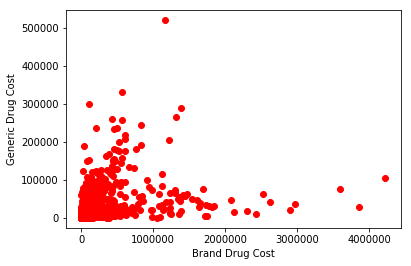

In [41]:
plt.scatter(ps_dd_df["brand_drug_cost"], ps_dd_df["generic_drug_cost"], color = "r")
plt.xlabel("Brand Drug Cost") #scatter plot of ps_dd_df data
plt.ylabel("Generic Drug Cost")
#plt.xlim(-50,200000)
#plt.ylim(-50,200000)

Text(0, 0.5, 'Log Generic Drug Cost')

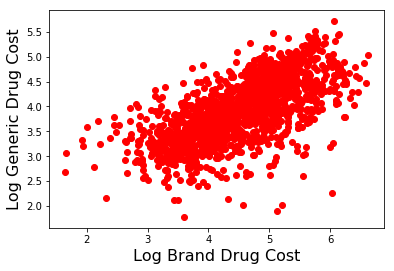

In [42]:
plt.scatter(ps_dd_df["log_brand_cost"], ps_dd_df["log_generic_cost"], color = "r")
plt.xlabel("Log Brand Drug Cost", fontsize = 16) #scatter plot of ps_dd_df data
plt.ylabel("Log Generic Drug Cost", fontsize =16)


Text(0, 0.5, 'Generic Drug Cost')

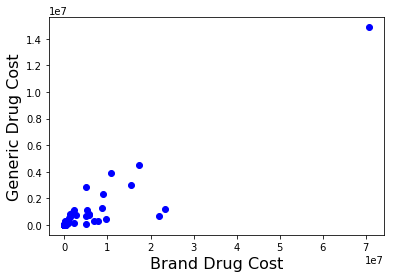

In [43]:
plt.scatter(specialty_df["brand_drug_cost"],specialty_df["generic_drug_cost"], color = "b")
plt.xlabel("Brand Drug Cost", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Generic Drug Cost",  fontsize = 16)

Text(0, 0.5, 'Log Generic Drug Cost')

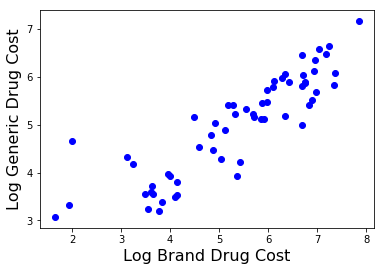

In [44]:
plt.scatter(specialty_df["log_brand_cost"],specialty_df["log_generic_cost"], color = "b")
plt.xlabel("Log Brand Drug Cost", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Log Generic Drug Cost",  fontsize = 16)

In [45]:
specialty_df.sort_values("generic_brand_ratio_cost", inplace =True, na_position = "first") #remove later

In [46]:
specialty_df["generic_brand_ratio_cost"].describe() #add cost to end of ratio

count    60.000000
mean      6.106801
std       9.359200
min       0.002250
25%       1.166946
50%       2.704012
75%       5.575283
max      49.642864
Name: generic_brand_ratio_cost, dtype: float64

Text(0, 0.5, 'Generic-Brand ratio')

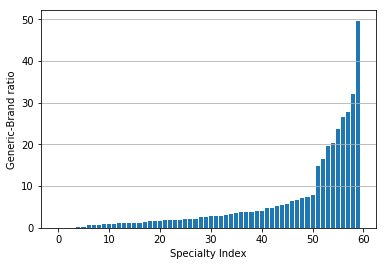

In [47]:
plt.grid(True, "both", "y") #add cost to end of ratio
plt.bar(range(len(specialty_df)),specialty_df["generic_brand_ratio_cost"]) #bar graph of specialty generic to brand ratios
plt.xlabel("Specialty Index")
plt.ylabel("Generic-Brand ratio")

In [48]:
specialty_df["specialty_description"] #Index for Specialties

Index
0                                               Dentist
1     Thoracic Surgery (Cardiothoracic Vascular Surg...
2                                      Thoracic Surgery
3                              Interventional Radiology
4                                             Counselor
5                                           Hospitalist
6                                              Podiatry
7                                    Orthopedic Surgery
8                  Physical Medicine and Rehabilitation
9                                  Diagnostic Radiology
10                                         Neurosurgery
11                                   Radiation Oncology
12                                     Registered Nurse
13                  Certified Clinical Nurse Specialist
14                   Plastic and Reconstructive Surgery
15                          Oral Surgery (Dentist only)
16                                      Pain Management
17                                       A

Text(0, 0.5, 'Generic to Brand Cost Ratio')

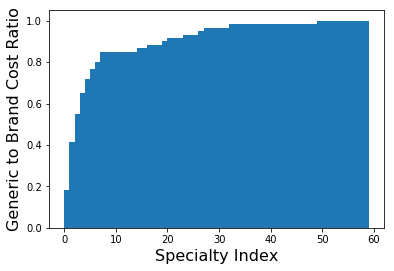

In [49]:
plt.hist(specialty_df["generic_brand_ratio_cost"], bins = range(len(specialty_df)), density =True, cumulative = True) #bar graph of specialty generic to brand ratios
plt.xlabel("Specialty Index", fontsize =16)
plt.ylabel("Generic to Brand Cost Ratio", fontsize = 16)

In [50]:
def low_mid_high(generic_brand_ratio_cost): 
    '''Sectioning off Generic Brands ratio cost as low to high'''
    #if generic_brand_ratio_cost
    if generic_brand_ratio_cost <= 10:
        return "0-10"
    elif generic_brand_ratio_cost <= 40:
        return "11-40"
    elif generic_brand_ratio_cost > 40:
        return ">40"

In [51]:
specialtyCountNormalize = specialty_df["generic_brand_ratio_cost"].map(low_mid_high).value_counts(normalize = True, sort = False) #normalized values

In [52]:
specialtyCount = specialty_df["generic_brand_ratio_cost"].map(low_mid_high).value_counts(sort = False)

In [53]:
print(specialtyCount.sort_values())

>40       1
11-40     8
0-10     51
Name: generic_brand_ratio_cost, dtype: int64


Text(0, 0.5, 'Specialty Count')

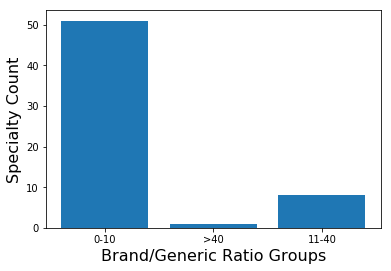

In [54]:
xIndex = specialtyCount.index.values
plt.bar(xIndex, list(specialtyCount))
plt.xlabel("Brand/Generic Ratio Groups", fontsize =16)
plt.ylabel("Specialty Count", fontsize = 16)

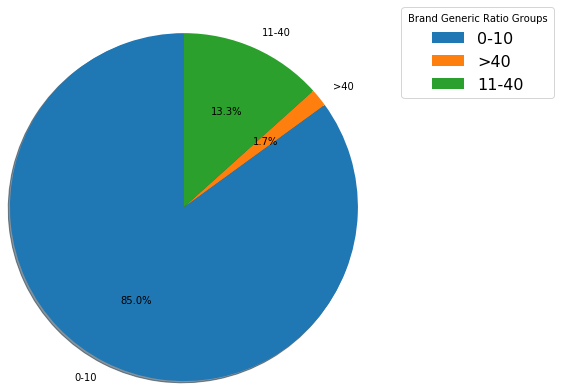

In [55]:
ax = plt.pie(x = list(specialtyCount), labels = xIndex, autopct="%1.1f%%", shadow=True, startangle = 90, radius = 2)
plt.legend(xIndex, title="Brand Generic Ratio Groups", loc = (1.5,1), fontsize =16)

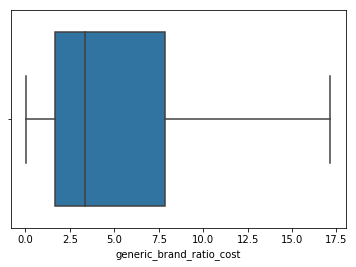

In [56]:
ax = sns.boxplot("generic_brand_ratio_cost", data=ps_dd_df, showfliers=False)


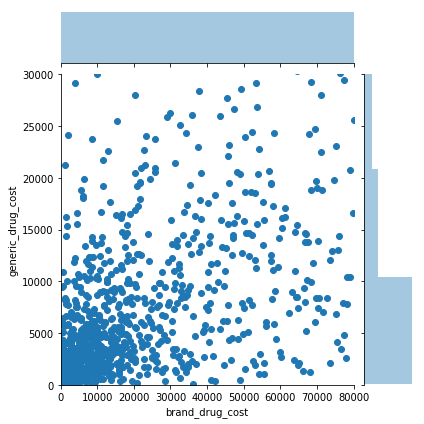

In [57]:
sns.jointplot("brand_drug_cost", "generic_drug_cost", kind = "scatter", data=ps_dd_df, xlim = (0,80000), ylim = (0,30000))

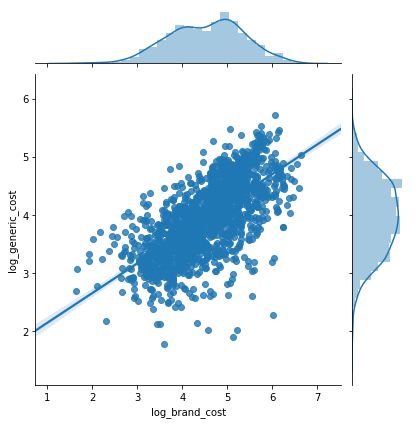

In [58]:
sns.jointplot("log_brand_cost", "log_generic_cost", kind = "reg", data=ps_dd_df)

In [59]:
#ps_dd_df.head(10)

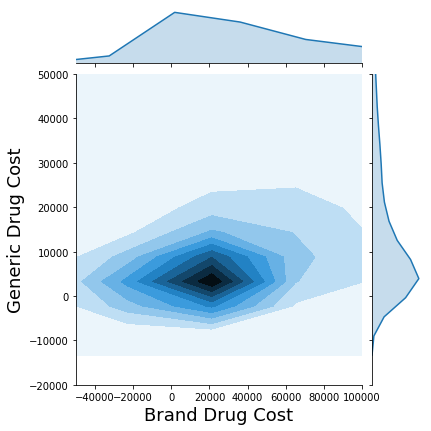

In [60]:
ax = sns.jointplot("brand_drug_cost", "generic_drug_cost", data=ps_dd_df,kind = "kde", xlim = (-50000,100000), ylim = (-20000,50000) )
ax.set_axis_labels(xlabel = "Brand Drug Cost", ylabel = "Generic Drug Cost", fontsize = 18)


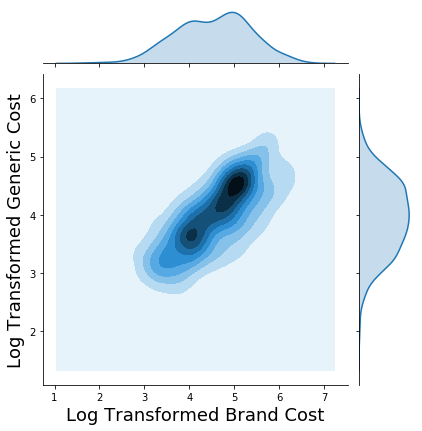

In [61]:
ax = sns.jointplot("log_brand_cost", "log_generic_cost", data=ps_dd_df,kind = "kde" )
ax.set_axis_labels(xlabel = "Log Transformed Brand Cost", ylabel = "Log Transformed Generic Cost", fontsize = 18)


Maybe Change to brand/generic ratio

In [62]:
top_df = specialty_df.loc[specialty_df["counts"]>150].sort_values("counts", ascending=False) #run a search for specialties with over 150 providers
top_df

,specialty_description,counts,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,generic_brand_ratio_cost,nppes_provider_zip5,total_claim_count,total_drug_cost,ABACAVIR,ABACAVIR-LAMIVUDINE,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,ABILIFY MAINTENA,ACAMPROSATE CALCIUM,ACARBOSE,ACCUPRIL,ACEBUTOLOL HCL,ACETAMINOPHEN-CODEINE,ACETAZOLAMIDE,ACTEMRA,ACYCLOVIR,ADACEL TDAP,ADAPALENE,ADCIRCA,ADDERALL,ADDERALL XR,ADEFOVIR DIPIVOXIL,ADEMPAS,ADVAIR DISKUS,ADVAIR HFA,AGGRENOX,ALBUTEROL SULFATE,ALCLOMETASONE DIPROPIONATE,ALCOHOL PADS,ALCOHOL PREP PADS,ALENDRONATE SODIUM,ALFUZOSIN HCL ER,ALLOPURINOL,ALOSETRON HCL,ALPHAGAN P,ALPRAZOLAM,ALPRAZOLAM ER,ALTAVERA,AMANTADINE,AMBIEN CR,AMIKACIN SULFATE,AMILORIDE HCL,AMIODARONE HCL,AMITIZA,AMITRIPTYLINE HCL,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE-BENAZEPRIL,AMLODIPINE-ATORVASTATIN,AMLODIPINE-OLMESARTAN,AMLODIPINE-VALSARTAN,AMLODIPINE-VALSARTAN-HCTZ,AMMONIUM LACTATE,AMOXAPINE,AMOXICILLIN,AMOXICILLIN-CLAVULANATE POTASS,AMPICILLIN TRIHYDRATE,AMPYRA,ANAGRELIDE HCL,ANASTROZOLE,ANDROGEL,ANORO ELLIPTA,APRISO,APTIOM,ARANESP,ARIPIPRAZOLE,ARISTADA,ARMODAFINIL,ARMOUR THYROID,ARNUITY ELLIPTA,...,VAGIFEM,VALACYCLOVIR,VALGANCICLOVIR HCL,VALIUM,VALPROIC ACID,VALSARTAN,VALSARTAN-HYDROCHLOROTHIAZIDE,VANCOMYCIN,VANCOMYCIN HCL,VASCEPA,VELPHORO,VEMLIDY,VENCLEXTA,VENLAFAXINE HCL,VENLAFAXINE HCL ER,VENTOLIN HFA,VERAPAMIL ER,VERAPAMIL ER PM,VERAPAMIL HCL,VERAPAMIL SR,VESICARE,VIBERZI,VICTOZA 2-PAK,VICTOZA 3-PAK,VIGAMOX,VIIBRYD,VIMPAT,VIRACEPT,VIREAD,VIVELLE-DOT,VIVITROL,VOLTAREN,VOTRIENT,VRAYLAR,VYVANSE,WARFARIN SODIUM,WATER,WELCHOL,WELLBUTRIN XL,XALATAN,XALKORI,XANAX,XARELTO,XELJANZ,XELJANZ XR,XENAZINE,XIFAXAN,XIGDUO XR,XOLAIR,XOPENEX HFA,XTANDI,YUVAFEM,ZALEPLON,ZARXIO,ZENPEP,ZEPATIER,ZERBAXA,ZETIA,ZIDOVUDINE,ZINBRYTA,ZIOPTAN,ZIPRASIDONE HCL,ZOLOFT,ZOLPIDEM TARTRATE,ZOLPIDEM TARTRATE ER,ZONISAMIDE,ZOSTAVAX,ZUBSOLV,ZYDELIG,ZYPREXA,ZYPREXA RELPREVV,ZYTIGA,log_brand_cost,log_generic_cost,Index
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42,Internal Medicine,546,128509.0,70685501.24,556372.0,14874127.80,4.752245,10927880,730729,1.001324e+08,313.0,440.0,11.0,0.0,0.0,37.0,12.0,13.0,2841.0,108.0,0.0,570.0,630.0,0.0,29.0,0.0,13.0,13.0,0.0,3092.0,54.0,74.0,389.0,0.0,17.0,137.0,3590.0,160.0,4682.0,0.0,45.0,2814.0,0.0,0.0,83.0,0.0,0.0,0.0,289.0,331.0,793.0,37296.0,1115.0,82.0,145.0,331.0,132.0,191.0,12.0,381.0,1036.0,14.0,0.0,0.0,255.0,189.0,139.0,0.0,0.0,34.0,207.0,0.0,11.0,12.0,17.0,...,0.0,1249.0,0.0,34.0,131.0,3470.0,2395.0,0.0,81.0,92.0,0.0,0.0,0.0,42.0,372.0,3484.0,559.0,12.0,25.0,0.0,362.0,12.0,25.0,112.0,0.0,61.0,60.0,0.0,239.0,0.0,0.0,358.0,0.0,0.0,60.0,3122.0,0.0,90.0,0.0,0.0,0.0,0.0,1868.0,0.0,0.0,0.0,67.0,0.0,0.0,12.0,0.0,38.0,93.0,23.0,38.0,12.0,0.0,603.0,12.0,0.0,0.0,37.0,0.0,4230.0,90.0,0.0,211.0,13.0,0.0,0.0,0.0,0.0,7.849330,7.172432,42
37,Nurse Practitioner,307,29112.0,17398699.79,156308.0,4529070.39,3.841561,6158641,199551,2.895079e+07,16.0,39.0,0.0,57.0,0.0,0.0,0.0,0.0,568.0,0.0,0.0,78.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,468.0,0.0,0.0,0.0,0.0,34.0,106.0,502.0,92.0,561.0,0.0,0.0,564.0,0.0,0.0,77.0,0.0,0.0,11.0,232.0,12.0,354.0,8500.0,79.0,0.0,0.0,44.0,0.0,97.0,0.0,29.0,271.0,0.0,36.0,16.0,21.0,0.0,0.0,0.0,0.0,32.0,714.0,0.0,0.0,24.0,0.0,...,0.0,202.0,237.0,0.0,11.0,547.0,169.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,170.0,1086.0,76.0,0.0,11.0,0.0,55.0,0.0,0.0,54.0,0.0,15.0,173.0,12.0,84.0,0.0,0.0,203.0,0.0,0.0,11.0,1796.0,0.0,11.0,0.0,0.0,0.0,0.0,337.0,0.0,0.0,0.0,11.0,14.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,197.0,11.0,723.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,7.240517,6.656009,37
34,Student in an Organized Health Care Education/...,288,4426.0,2614946.08,33511.0,772124.76,3.386689,5769212,48818,5.776868e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1503.0,0.0,0.0,0.0,0.0,

In [63]:
topFour = top_df["specialty_description"].iloc[0:4].tolist() #top 4 counts
print(topFour[0])

Internal Medicine


In [64]:
#for value in top_df["specialty_description"]:
    #print(ps_dd_df.loc[( ps_dd_df['specialty_description'] == value ) , 'generic_brand_ratio_cost'].tolist())
    

In [65]:
titles = []
for string in topFour:
    if len(string) > 25:
        string=string.split()
        temp = ''
        for x in string:
            temp+= x[0]
        string = temp
    titles.append(string)
print(titles)

['Internal Medicine', 'Nurse Practitioner', 'SiaOHCEP', 'Dentist']


Text(0, 0.5, 'Log Transformed Generic Cost')

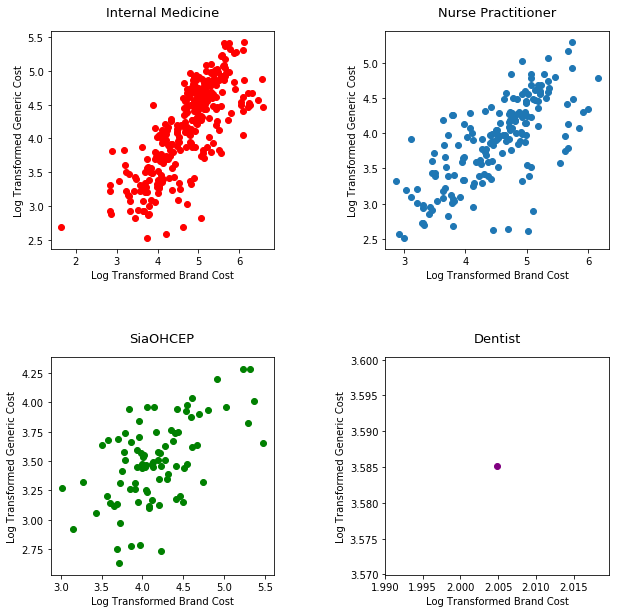

In [66]:

fig , axes = plt.subplots(2,2, figsize = (10,10))
plt.subplots_adjust(wspace = .5, hspace =.5 )


axes[0,0].scatter(ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[0] ) , 'log_brand_cost'].tolist() , ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[0] ) , 'log_generic_cost'].tolist(),c='r')
axes[0,0].set_title(titles[0], fontsize = 13, pad =15)
axes[0,0].tick_params(labelsize=10)
axes[0,0].set_xlabel("Log Transformed Brand Cost", fontsize = 10)
axes[0,0].set_ylabel("Log Transformed Generic Cost", fontsize = 10)
#axes[0,0].x_tick(rotation=30)

axes[0,1].scatter(ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[1] ) , 'log_brand_cost'].tolist() , ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[1] ) , 'log_generic_cost'].tolist())
axes[0,1].set_title(titles[1], fontsize = 13, pad =15)
axes[0,1].tick_params(labelsize=10)
axes[0,1].set_xlabel("Log Transformed Brand Cost", fontsize = 10)
axes[0,1].set_ylabel("Log Transformed Generic Cost", fontsize = 10)

axes[1,0].scatter(ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[2] ) , 'log_brand_cost'].tolist() , ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[2] ) , 'log_generic_cost'].tolist(), c ='g')
axes[1,0].set_title(titles[2], fontsize = 13, pad =15)
axes[1,0].tick_params(labelsize=10)
axes[1,0].set_xlabel("Log Transformed Brand Cost", fontsize = 10)
axes[1,0].set_ylabel("Log Transformed Generic Cost", fontsize = 10)

axes[1,1].scatter(ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[3] ) , 'log_brand_cost'].tolist() , ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[3] ) , 'log_generic_cost'].tolist(), c = 'purple')
axes[1,1].set_title(titles[3], fontsize = 13, pad =15)
axes[1,1].tick_params(labelsize=10)
axes[1,1].set_xlabel("Log Transformed Brand Cost", fontsize = 10)
axes[1,1].set_ylabel("Log Transformed Generic Cost", fontsize = 10)

In [70]:
ps_dd_df.to_csv("data\ps_dd_df.csv")

In [71]:
specialty_df.to_csv("data\specialty_df.csv", index =False)